In [1]:
from joblib import load, dump
import numpy as np
import h5py
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances, distance_metrics
from matplotlib import pyplot as plt
import numba
from umda import MRS, EmbeddingModel

plt.style.use('publication')

Traceback (most recent call last):
  File "/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/site-packages/rdkit/Chem/PandasTools.py", line 130, in <module>
    if 'display.width' in pd.core.config._registered_options:
AttributeError: module 'pandas.core' has no attribute 'config'


In [2]:
embedder = EmbeddingModel.from_pkl("../../models/mol2vec_model.pkl", "../../models/embedding_pipeline.pkl", radius=1)

In [3]:
embedder.save("../../models/EmbeddingModel.pkl")

2021-02-24 16:16:34.584 | INFO     | umda.classes:save:61 - Saved model to ../../models/EmbeddingModel.pkl.


In [4]:
gp_grid = load("../../models/gp_grid.pkl")

dump(gp_grid.best_estimator_, "../../models/best_gp_estimator.pkl")

['../../models/best_gp_estimator.pkl']

In [6]:
mrs_gp = MRS.from_pickle("../../models/kmeans_model.pkl", "../../models/best_gp_estimator.pkl")

mrs_gp.save("../../models/TMC1_MRS_GP.pkl")

2021-02-24 16:29:31.847 | INFO     | umda.classes:save:228 - Saved MRS to ../../models/TMC1_MRS_GP.pkl


In [2]:
data = h5py.File("../../data/processed/smiles_embeddings_300.h5", "r")

In [3]:
pipeline = load("../../models/embedding_pipeline.pkl")

In [4]:
tmc1_df = pd.read_pickle("../../data/interim/tmc1_table_vecs.pkl")

In [5]:
tmc1_vecs = np.vstack(tmc1_df["Vecs"])
tmc1_embedding = pipeline[0].transform(tmc1_vecs).compute()

### GP recommendations without clustering 

In [ ]:
gp_nocluster_df = mrs_gp.recommend(X=tmc1_embedding, cluster=False, h5_data=data)

2021-02-24 16:25:54.901 | INFO     | umda.classes:recommend:192 - There are 3857598 molecules in this aggregate.


In [87]:
gp_nocluster_df.sort_values(["Abundance"], ascending=False).head(30)

,Abundance,Uncertainty,Index,SMILES,Counts
0,14.172688,0.223950,0,C,2
227,14.172688,0.484688,482,C#CC#CC=O,1
235,14.172688,1.093949,15,C1CC1,1
234,14.172688,1.367699,97,OC1CCC1,1
233,14.172688,1.236555,302,CC1CC(=O)O1,2
232,14.172688,1.559743,462,CC1OCCO1,3
231,14.172688,1.665924,463,OC1CCCC1,1
230,14.172688,1.680145,465,CC1C(C)C1C,1
229,14.172688,0.586344,14137,N#CC#CC#CC#N,1
228,14.172688,1.452699,467,CC1C(C)N1C,3


In [7]:
gp_cluster_df = mrs_gp.recommend(X=tmc1_embedding, cluster=True, h5_data=data)

2021-02-24 16:29:42.870 | INFO     | umda.classes:recommend:183 - Using the following clusters: dask.array<getitem, shape=(nan,), dtype=int32, chunksize=(nan,), chunktype=numpy.ndarray>


ValueError: operands could not be broadcast together with shapes (nan,) (3857766,)

In [8]:
gp_cluster_df.sort_values(["Abundance"], ascending=False).head(20)

,Abundance,Uncertainty,Index,SMILES,Counts
0,10.053851,1.928659,724831,CC#CC1CC2NC12,1
1,9.723989,1.977246,318484,FC(F)(F)C1CO1,2
2,9.644606,1.962432,640828,C#CC1OC(=N)C1N,2
3,9.390562,1.923737,830377,CC1NCC(=O)C1C#N,1
4,9.144345,1.919543,725054,COC1C(C)CC1C#N,4
5,9.103840,1.900571,110676,CN=C(O)C(O)C=O,4
6,9.088730,1.866379,318964,CC(=O)C(C)(O)CC#N,2
7,9.039132,1.951676,272544,CC1OC12CC1CC12,4
8,8.938110,1.888641,833329,CC(C#N)COC(=N)O,1
9,8.916451,1.931812,16832,CNC1:C:C:[NH]:C:1C,2


In [10]:
comp = gp_cluster_df.sort_values(["Abundance"], ascending=False).head(15)["SMILES"].to_list()

In [11]:
comp

['CC#CC1CC2NC12',
 'FC(F)(F)C1CO1',
 'C#CC1OC(=N)C1N',
 'CC1NCC(=O)C1C#N',
 'COC1C(C)CC1C#N',
 'CN=C(O)C(O)C=O',
 'CC(=O)C(C)(O)CC#N',
 'CC1OC12CC1CC12',
 'CC(C#N)COC(=N)O',
 'CNC1:C:C:[NH]:C:1C',
 'CC1CCCCCN1C',
 'O=COC=NC1CCC1',
 'ON=C(Cl)C1C=CC=CC=1',
 'CC(C#N)CC(C)CO',
 'CC12CCOC1(CO)C2']

## Using gradient boosting for recommendations

In [6]:
boost_grid = load("../../models/gradient_boosting_grid.pkl")

dump(boost_grid.best_estimator_, "../../models/best_gbr_estimator.pkl")

['../../models/best_gbr_estimator.pkl']

In [7]:
mrs_gbr = MRS.from_pickle("../../models/kmeans_model.pkl", "../../models/best_gbr_estimator.pkl")

mrs_gbr.save("../../models/TMC1_MRS_GBR.pkl")

2021-02-24 16:28:26.455 | INFO     | umda.classes:save:228 - Saved MRS to ../../models/TMC1_MRS_GBR.pkl


In [ ]:
gbr_nocluster_df = mrs_gbr.recommend(X=tmc1_embedding, cluster=False, h5_data=data)

2021-02-24 16:27:33.961 | INFO     | umda.classes:recommend:192 - There are 3857598 molecules in this aggregate.


In [8]:
gbr_cluster_df = mrs_gbr.recommend(X=tmc1_embedding, cluster=True, h5_data=data, dist_thres=1e-4)

2021-02-24 16:28:32.490 | INFO     | umda.classes:recommend:183 - Using the following clusters: dask.array<getitem, shape=(nan,), dtype=int32, chunksize=(nan,), chunktype=numpy.ndarray>


ValueError: operands could not be broadcast together with shapes (nan,) (3857766,)

In [ ]:
gbr_cluster_df.head(20)

In [154]:
from subprocess import Popen, PIPE
import matplotlib.image as image
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [155]:
def add_image(axis, filepath, zoom=0.15, position=[0.0, 0.0]):
    """
        Function to add an image annotation to a specified axis.
        Takes the matplotlib axis and filepath to the image as input,
        and optional arguments for the scaling (zoom) and position of
        the image in axis units.
    """
    image = OffsetImage(plt.imread(filepath, format="png"), zoom=zoom)
    image.image.axes = axis

    box = AnnotationBbox(
        image, position, xybox=position, xycoords="data", frameon=False
    )
    axis.add_artist(box)


In [156]:
for index, smi in enumerate(comp):
    cmd = f"""obabel -:"{smi}" -opng"""
    with open(f"molecules/{index}.png", "w+") as write_file:
        proc = Popen(cmd, stdout=write_file, shell=True)

In [157]:
selected = gbr_cluster_df.loc[gbr_cluster_df["SMILES"].isin(comp[:10])]
gp_selected = gp_cluster_df.loc[gp_cluster_df["SMILES"].isin(comp[:10])]

selected.reset_index(inplace=True, drop=True)

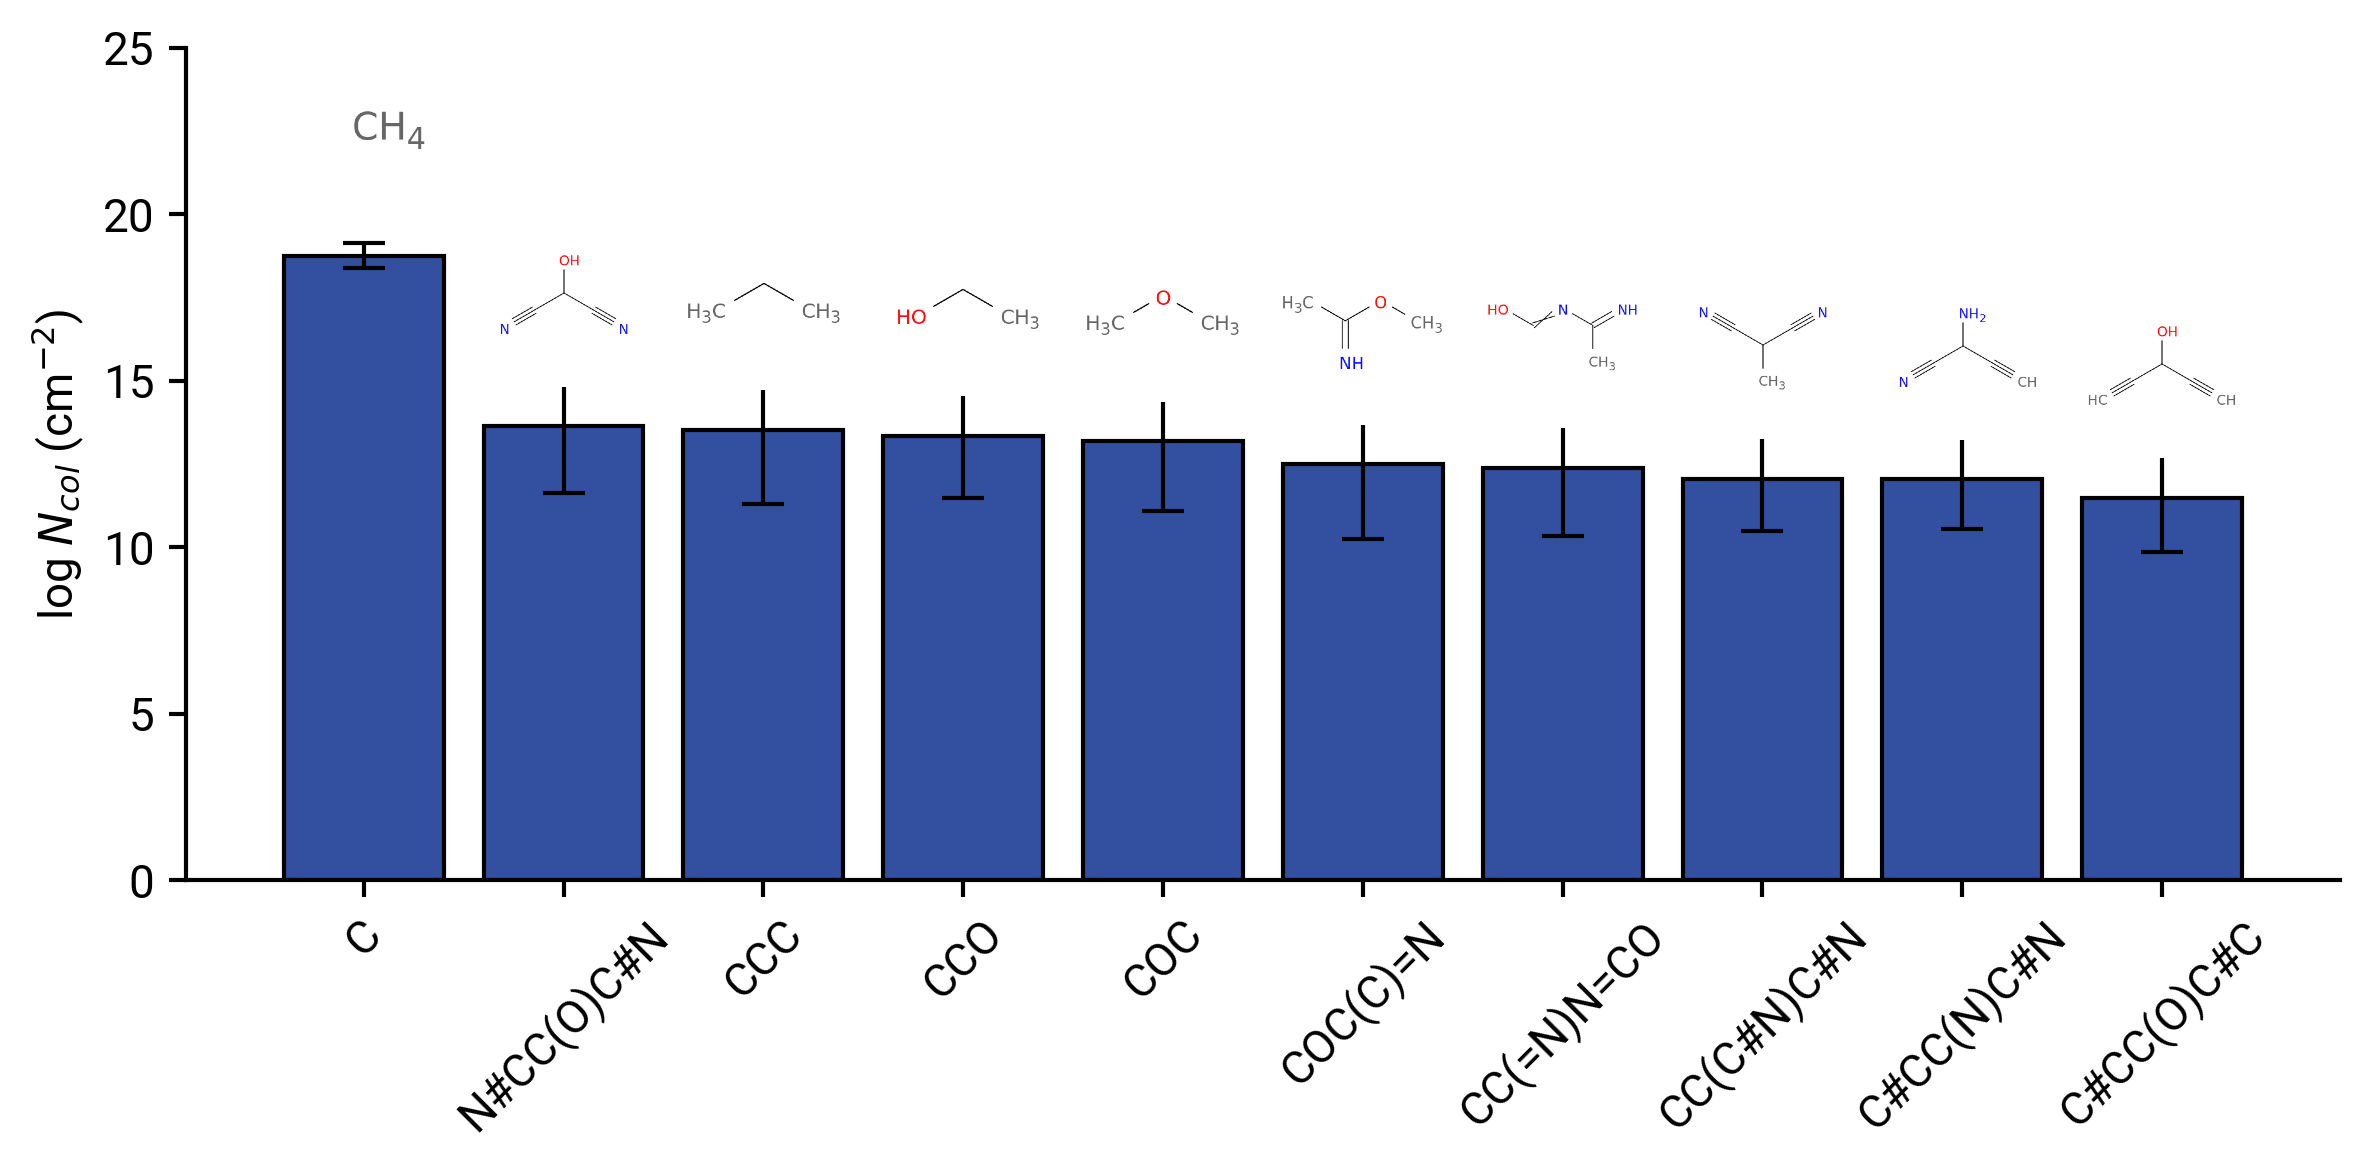

In [158]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(np.arange(len(selected)), selected["Abundance"], yerr=gp_selected["Uncertainty"], capsize=5, linewidth=1., edgecolor="k")
ax.set_xticks(np.arange(len(selected)))
ax.set_xticklabels(comp, rotation=45)
for index, row in selected.iterrows():
    add_image(ax, f"molecules/{index}.png", zoom=0.15, position=[index, row["Abundance"] + 4.])
ax.set_ylim([0., 25.])
ax.set_ylabel("log $N_{col}$ (cm$^{-2}$)")
fig.savefig("example-predictions.png", dpi=300, transparent=True)

## Requests

In [159]:
targets = [
    "C1=CNC=C1",   # pyrrole
    "C1=CC=NC=C1", # pyridine
    "C1=CC=C(C(=C1)C#N)C#N", # ortho-DCB
    "C(C(=O)O)N", # glycine
    "C1C=CC2=CC=CC=C21", # indene
    "C1=CC=CC=C1", # benzene
    "C1=CC=C(C=C1)O", # phenol
    "C1=CC=C2C=C3C=CC=CC3=CC2=C1", # anthracene
    "C1=CC=C2C=CC=CC2=C1", # naphthalene
    "C#N", # hydrogen cyanide
]

In [160]:
target_df = mrs_gbr.predict(smi=targets, embedding_model=embedder)

In [161]:
target_df["Name"] = ["Pyrrole", "Pyridine", "ortho-DCB", "Glycine", "Indene", "Benzene", "Phenol", "Anthracene", "Naphthalene", "Hydrogen cyanide"]

In [162]:
target_df

,Abundance,SMILES,Name
0,11.711704,C1=CNC=C1,Pyrrole
1,11.427872,C1=CC=NC=C1,Pyridine
2,0.732758,C1=CC=C(C(=C1)C#N)C#N,ortho-DCB
3,11.748555,C(C(=O)O)N,Glycine
4,11.650296,C1C=CC2=CC=CC=C21,Indene
5,11.971750,C1=CC=CC=C1,Benzene
6,11.531630,C1=CC=C(C=C1)O,Phenol
7,11.533435,C1=CC=C2C=C3C=CC=CC3=CC2=C1,Anthracene
8,10.405784,C1=CC=C2C=CC=CC2=C1,Naphthalene
9,12.403852,C#N,Hydrogen cyanide


In [163]:
indene = np.sum([1345768928638.639, 2727913957371.784, 1753385269270.761, 3079442410060.451])

In [164]:
print(f"{indene:.4e}")

8.9065e+12


In [165]:
tmc1_predict = mrs_gbr.predict(X=tmc1_embedding, smi=tmc1_df["SMILES"].to_list())

In [166]:
tmc1_predict["Observed"] = np.log10(tmc1_df["Column density (cm^-2)"].values)

In [167]:
np.mean(np.square(mrs_gp.predict(X=tmc1_embedding, smi=tmc1_df["SMILES"].to_list())["Abundance"] - tmc1_predict["Observed"].values))

2.142258522646409

In [168]:
tmc1_predict.iloc[60:73]

,Abundance,SMILES,Observed
60,12.130689,C#CC#C[C+]=O,12.230449
61,11.301237,C=[N],11.176091
62,13.045949,C=O,13.079181
63,11.424021,C#CC#[O+],11.322219
64,11.633401,O=C=[OH+],11.602060
65,11.579530,C=[OH+],11.477121
66,10.688802,NC#[O+],10.602060
67,10.960844,C#N[O],10.845098
68,11.126641,OC#N,11.041393
69,21.853485,[HH],22.000000


In [169]:
tmc1_predict.sample(20, replace=False)

,Abundance,SMILES,Observed
10,13.182117,C1C#C1,13.269513
59,11.899358,C#CC#CC#C[C+]=O,11.892095
22,13.365423,[C]#CC#C,13.429752
31,13.186284,O=C=S,13.260071
60,12.130689,C#CC#C[C+]=O,12.230449
33,13.093065,[C-]#CC#[S+],13.139879
0,12.538943,CC#CC#CC#C,12.491362
70,11.134339,[C]#CC#[C]=O,11.079181
80,10.410404,C=C=C=C=C=[C],10.328380
27,11.895656,C#CC#[NH+],11.869818


In [170]:
np.mean(np.square(tmc1_predict["Abundance"] - tmc1_predict["Observed"]))

0.004394480379500624

### Cyanopolyyne comparison

In [171]:
cp_smiles = [
    "C#N",
    "C#CC#N",
    "C#CC#CC#N",
    "C#CC#CC#CC#N",
    "C#CC#CC#CC#CC#N",
    "C#CC#CC#CC#CC#CC#N",
#     "C#CC#CC#CC#CC#CC#CC#N"
]

In [172]:
cp_df = mrs_gbr.predict(smi=cp_smiles, embedding_model=embedder)

In [173]:
cp_comp_df = pd.merge(tmc1_df, cp_df, on="SMILES")

In [174]:
x = np.arange(1, len(cp_smiles) * 2 + 1., 2)

absent = [0, 2, 4]

In [175]:
mask = np.ones_like(x, dtype=bool)

In [176]:
mask[absent] = False

In [177]:
x[absent]

array([1., 5., 9.])

In [178]:
cp_comp_df = cp_comp_df.iloc[[5, 0, 1, 2, 3, 4]]

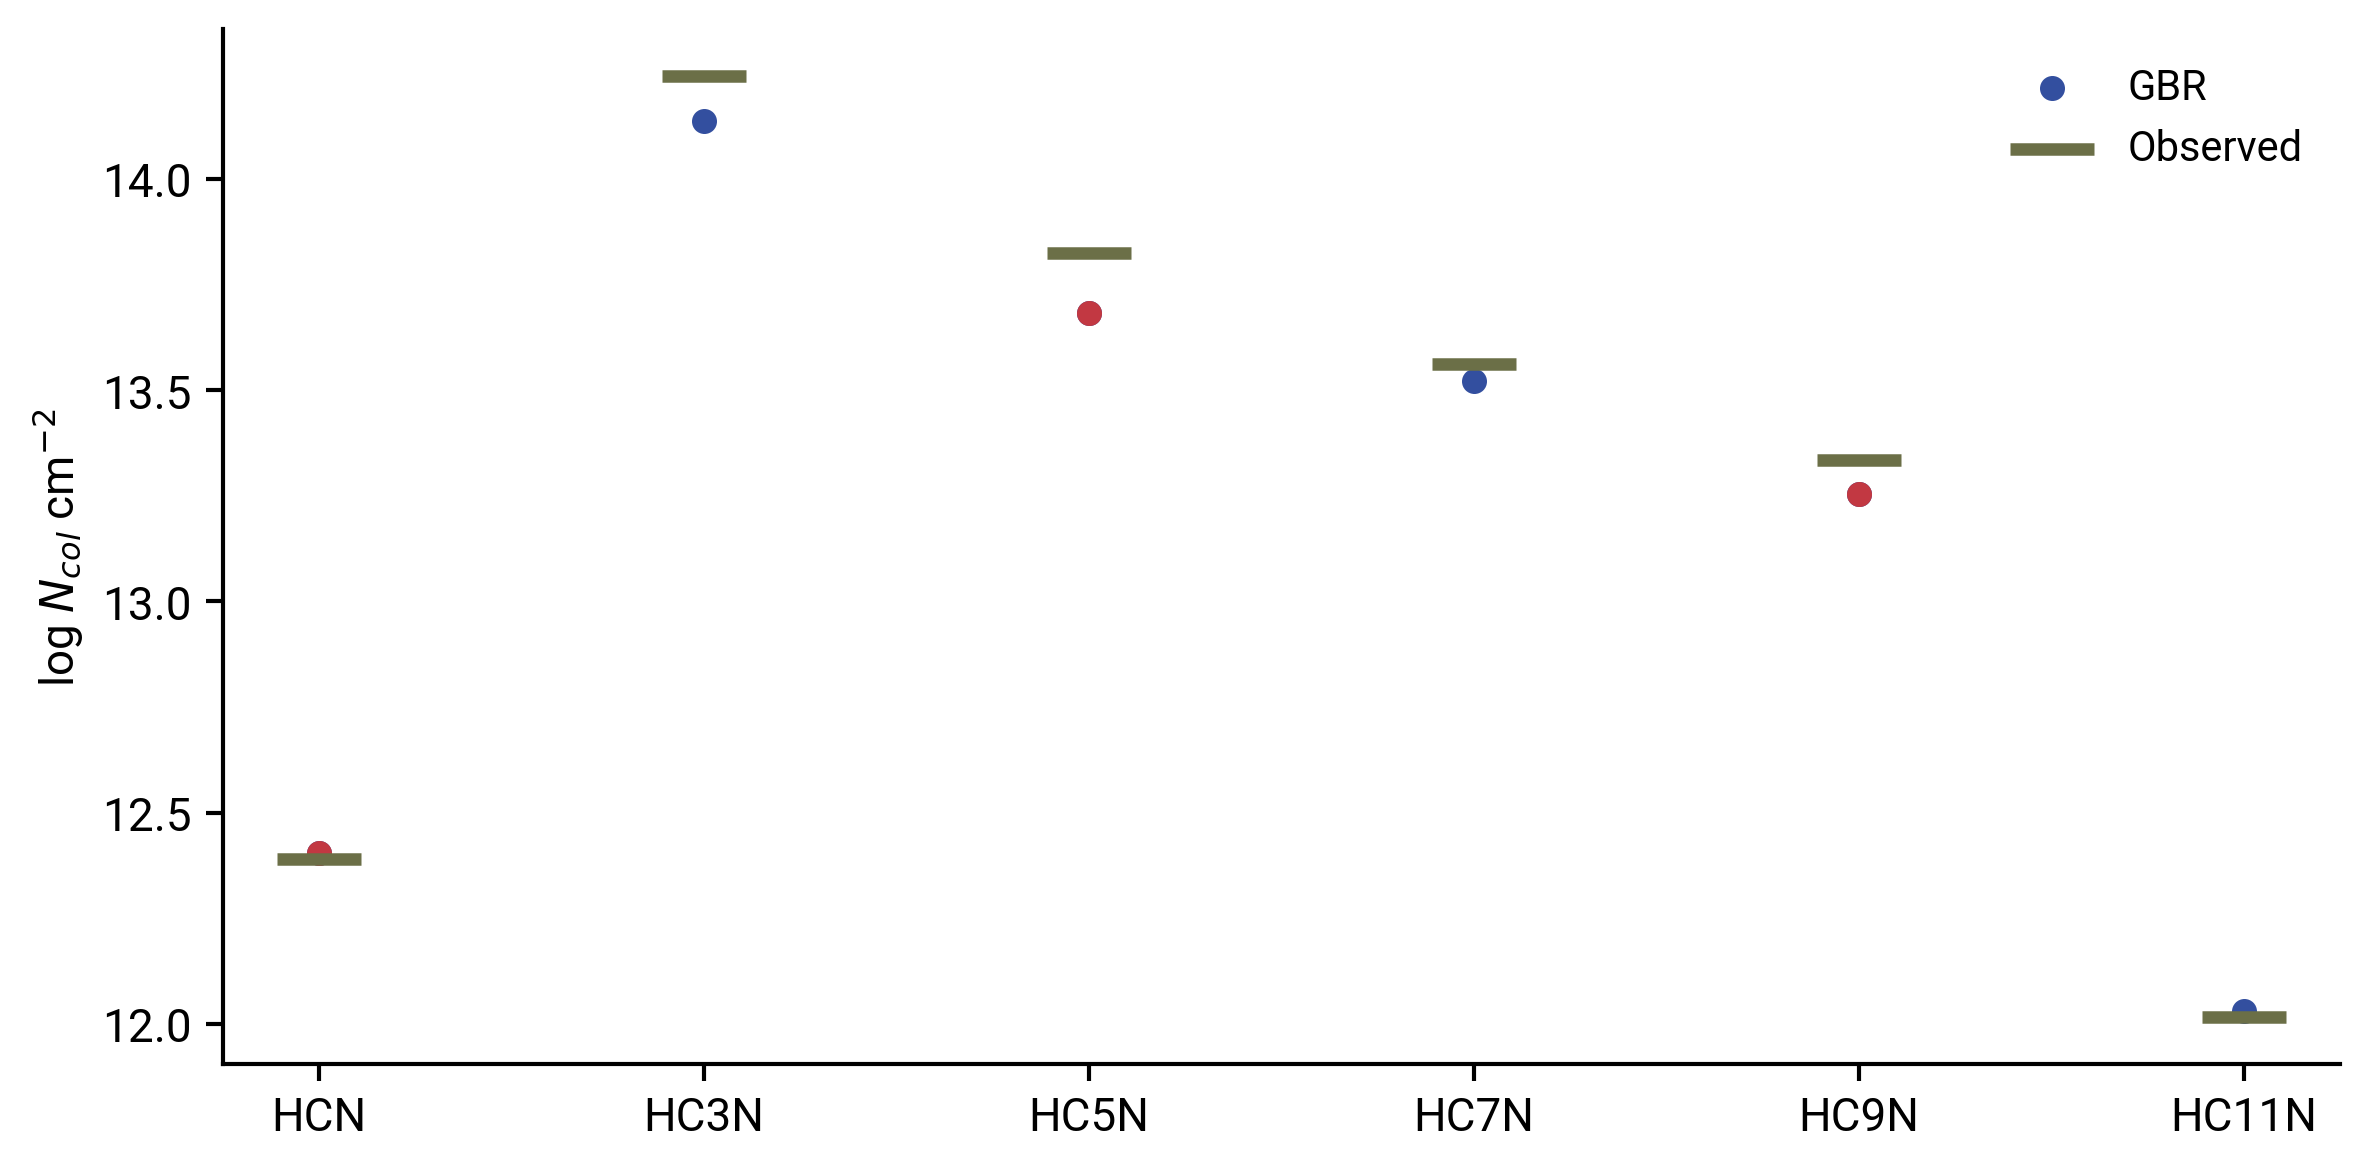

In [179]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(x, cp_df["Abundance"], label="GBR")
ax.scatter(x[absent], cp_df["Abundance"].iloc[[0, 2, 4]])
ax.scatter(x, np.log10(cp_comp_df["Column density (cm^-2)"]), marker='_', s=400, lw=3., label="Observed")
ax.set_xticks(x)
ax.set_xticklabels(["HCN", "HC3N", "HC5N", "HC7N", "HC9N", "HC11N"])
ax.set_ylabel("log $N_{col}$ cm$^{-2}$")
ax.legend()
fig.savefig("cyanopolyyne_validation.png", dpi=300)